<a href="https://colab.research.google.com/github/khushalkumar/intro-to-ml-and-nn/blob/main/3_ml_linear_regression_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dealing with Multicollinearity Using VIF in statsmodels

This notebook talks about:
    <br>1. Multicollinearity
    <br>2. Heteroskedasticity

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('cars24-car-price-clean.csv')

We're gonna use statsmodels library as it has support for VIF and for performing Linear Regression

In [ ]:
import statsmodels.api as sm

X = df[df.columns.drop('selling_price')]
Y = df['selling_price']

In [ ]:
X.shape, Y.shape

((19820, 17), (19820,))

sm, unlike sklearn, does not support adding that extra feature corresponding to the intercept

In [ ]:
X_sm = sm.add_constant(X)
X_sm.shape

(19820, 18)

In [ ]:
X_sm[:2] # As you can see, const column has been added.

,const,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.0,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,1.0,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728


In [ ]:
# Simple Linear Regression - OLS (Ordinary Least Squares)

sm_model = sm.OLS(Y, X_sm).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 2.017e+04
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:44:07   Log-Likelihood:                 125.84
No. Observations:               19820   AIC:                            -217.7
Df Residuals:                   19803   BIC:                            -83.48
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.204e-17      0.002  -3.05e-14      1.000      -0.003       0.003
year                 0.0650      0.001     54.830      0.000       0.063       0.067
km_driven           -0.0182      0.002     -9.609      0.000      -0.022      -0.015
mileage             -0.0487      0.003    -16.056      0.000      -0.055      -0.043
engine               0.0314      0.004      7.334      0.000       0.023       0.040
max_power            0.0274      0.004      7.106      0.000       0.020       0.035
age                 -0.0650      0.001    -54.830      0.000      -0.067      -0.063
make                 0.0608      0.003     19.874      0.000       0.055       0.067
model                0.7942      0.004    192.975      0.000       0.786       0.802
Individual          -0.0170      0.002     -9.509      0.000      -0.020      -0.013
Trustmark Dealer    -0.0035      0.002     -2.013      0.044      -0.007   -9.19e-05
Diesel               0.0141      0.007      1.997      0.046       0.000       0.028
Electric             0.0128      0.002      6.901      0.000       0.009       0.016
LPG                  0.0028      0.002      1.489      0.136      -0.001       0.007
Petrol              -0.0226      0.007     -3.119      0.002      -0.037      -0.008
Manual              -0.0129      0.002     -5.646      0.000      -0.017      -0.008
5                   -0.0246      0.006     -4.150      0.000      -0.036      -0.013
>5                  -0.0327      0.006     -5.237      0.000      -0.045      -0.020
==============================================================================
Omnibus:                     4569.412   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180275.540
Skew:                           0.334   Prob(JB):                         0.00
Kurtosis:                      17.760   Cond. No.                     8.91e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

![image.png](attachment:image.png)

![image.png](attachment:image.png)

`P>|t|` is the probability that tells us if the feature is significant or not.<br><br>
`std err:` Let's say I train a Linear Regression model on a bootstrapped sample and if I do that, say 40 times. After doing that  40 times, the avg value of the weight for a certain feature is in the coef column and the standard error is given in std err column. And the probability that it is significant is in the P>|t| column.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
# For each column index i(feature), we calculate the VIF using variance_inflation_factor(X_t.values, i)
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(len(X_t.columns))]
vif.sort_values(by = "VIF", ascending = False)

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,year,inf
5,age,inf
13,Petrol,17.949208
10,Diesel,17.033579
16,>5,13.316028
15,5,12.077742
3,engine,6.272148
7,model,5.801345
4,max_power,5.079379
6,make,3.204460


###### X_t.values vs X_t

In [ ]:
type(X_t.values)

numpy.ndarray

In [ ]:
type(X_t)

pandas.core.frame.DataFrame

VIF > 10 is an indicator of multi-collinearity<br>
But doesn't give us a license to blindly remove all features with VIF > 10

Feature with highest VIF should be removed. <br>
But we have two features "year" and "age" with VIF = inf.
<br>but inf can't be compared with inf.<br>
<br>Also, year and age are collinear. age can be calculate with year and vice versa.
<br>If two features are collinear, you don't remove all of them.
<br>If three features are collinear, you don't remove all of them.

In [ ]:
# Let's remove one of the features
cols2 = vif.sort_values(by = "VIF", ascending = False)['Features'][1:]

In [ ]:
X = df[cols2]
Y = df['selling_price']
X_sm = sm.add_constant(X)
sm_model = sm.OLS(Y, X_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 2.017e+04
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:10:19   Log-Likelihood:                 125.84
No. Observations:               19820   AIC:                            -217.7
Df Residuals:                   19803   BIC:                            -83.48
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.204e-17      0.002  

###### R-squared is still the same. Hence, we can go ahead to remove another feature.

In [ ]:
vif = pd.DataFrame()
X_t = X[cols2]
vif['Features'] = X_t.columns
# For each column index i(feature), we calculate the VIF using variance_inflation_factor(X_t.values, i)
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(len(X_t.columns))]
vif.sort_values(by = "VIF", ascending = False)

,Features,VIF
1,Petrol,17.949208
2,Diesel,17.033579
3,>5,13.316028
4,5,12.077742
5,engine,6.272148
6,model,5.801345
7,max_power,5.079379
8,make,3.204460
9,mileage,3.149380
0,age,1.922833


age was only correlated with year. We removed year, hence age has no more multicollinearity left.

In [ ]:
# Let's remove one of the features
cols3 = vif.sort_values(by = "VIF", ascending = False)['Features'][1:]

In [ ]:
X = df[cols3]
Y = df['selling_price']
X_sm = sm.add_constant(X)
sm_model = sm.OLS(Y, X_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 2.151e+04
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:46:16   Log-Likelihood:                 120.97
No. Observations:               19820   AIC:                            -209.9
Df Residuals:                   19804   BIC:                            -83.63
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.204e-17      0.002  

#### Optional HW: Google or write your own code to automate multiple iterations of VIF calculation and feature removal.

### Look for Heteroskedasticity in Data

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df[df.columns.drop('selling_price')]
Y = df['selling_price']
X = X.to_numpy()
Y = Y.to_numpy()
model.fit(X, Y)  # No need to add that extra column of 1s for sklearn
Y_hat = model.predict(X)

In [ ]:
errors = Y - Y_hat

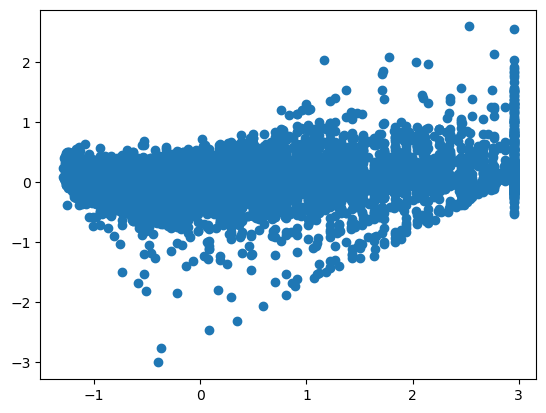

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Y, errors)

![image.png](attachment:image.png)

The spread is changing. Increasing/Decreasing.

![image.png](attachment:image.png)

For lower values of Y, the model is doing underprediction a lot and for higher values of Y, the model is doing over prediction a lot. <br>
We can do manual analysis of whether these samples are outliers or if there's anything different about these samples that leads to heteroskedasticity.

In [ ]:
errors

array([ 0.07199108,  0.07032535, -0.02055506, ..., -0.1580075 ,
        2.03155424,  0.07262606])

![image.png](attachment:image.png)

You may also set a upper and lower limit and if your error is beyond those limits, then you check what's wrong with the samples.
<br>Training the model on the remaining samples after removing the data points that are causing problems will also help analyze what the real issue is.

<strong>If you have any questions, connect with me here: https://www.linkedin.com/in/khushalkumar/</strong>